In [2]:
import Scribe as sc
from Scribe.Scribe import causal_net_dynamics_coupling as Scribe
import scanpy as sp
import numpy as np 
import os
import networkx as nx 
nx.__version__

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import dynamo as dyn 
import mygene
from anndata import AnnData

import sys
from importlib import reload
from pathlib import Path

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import scvelo as scv
scv.logging.print_version()


scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params('scvelo')  # for beautified visualization

%matplotlib inline

Running scvelo 0.2.2 (python 3.8.3) on 2020-09-15 21:09.


In [3]:
code_dir = os.getcwd()
base_dir = code_dir.replace("/codes_local","")
parent_dir = "/".join(base_dir.split("/")[:-1])
tools_dir = parent_dir + "/tools"

sys.path.insert(1, tools_dir)
import sc_addons
reload(sc_addons)

sp_name = base_dir.split("/")[-1]
analysis_name = ["4", "LouvainCluster"] ### Analysis name here

wk_dir = base_dir + "/3_Scribe/%s_Scribe_out_%s"%(analysis_name[0],analysis_name[1])
Path(wk_dir).mkdir(parents=True, exist_ok=True)
os.chdir(wk_dir)

print(sp_name, analysis_name)

0_Acute-Chronic ['4', 'LouvainCluster']


-----

In [48]:
scvelo_out = base_dir + "/2_scVelo/%s_scVelo_out_%s"%(analysis_name[0],analysis_name[1]) + '/' +'%s_scVelo_postPT.h5ad'%sp_name
scvelo_out = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/0_Acute-Chronic/2_scVelo/4_scVelo_out_LouvainCluster/louvain--6_8_scVelo.h5ad'
adata = scv.read(scvelo_out)

In [42]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
top_genes

Index(['Ddx39', 'Hsp90ab1', 'Nasp', 'Rrm2', 'Rrm1', 'Tacc3', 'Gmnn', 'Dut',
       'Anp32e', 'Hmgb2',
       ...
       'Phka2', 'Ctps2', 'Piga', 'Gemin8', 'Trappc2', 'Mid1', 'Uty', 'Ddx3y',
       'Kdm5d', 'Eif2s3y'],
      dtype='object', length=9043)

In [43]:
adata.var['fit_likelihood'].sort_values(ascending=False)

Ddx39       1.086748
Hsp90ab1    1.073293
Nasp        1.060107
Rrm2        1.007679
Rrm1        0.983320
              ...   
Mid1             NaN
Uty              NaN
Ddx3y            NaN
Kdm5d            NaN
Eif2s3y          NaN
Name: fit_likelihood, Length: 9043, dtype: float64

In [44]:
adata.var.loc['Il2ra']

Accession                ENSMUSG00000026770
Chromosome                                2
End                                11693193
Start                              11642807
Strand                                    +
gene_count_corr                      0.1207
velocity_gamma                      2.77734
velocity_r2                        0.616162
velocity_genes                         True
fit_alpha                          0.167248
fit_beta                          0.0707852
fit_gamma                          0.137118
fit_t_                              20.0341
fit_scaling                         2.97381
fit_std_u                          0.770012
fit_std_s                            0.2503
fit_likelihood                     0.329922
fit_u0                                    0
fit_s0                                    0
fit_pval_steady                    0.414085
fit_steady_u                        1.59092
fit_steady_s                       0.659779
fit_variance                    

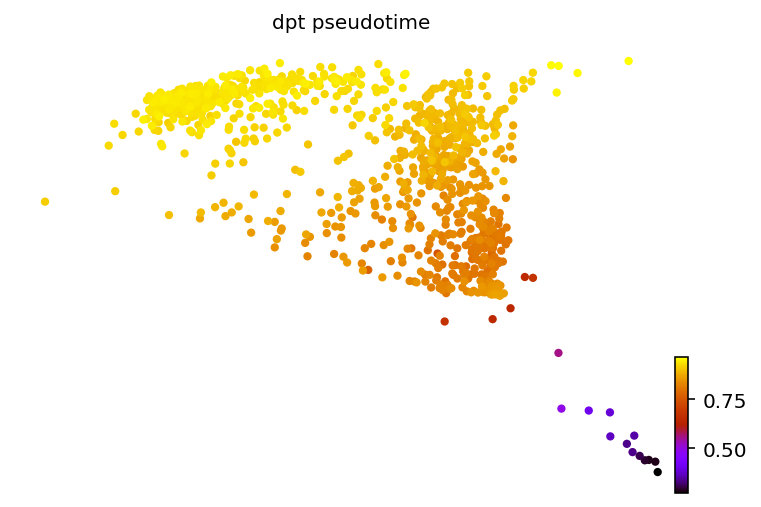

In [49]:
scv.pl.scatter(adata, basis="paga", color='dpt_pseudotime', color_map='gnuplot')

Create causal_model successfully


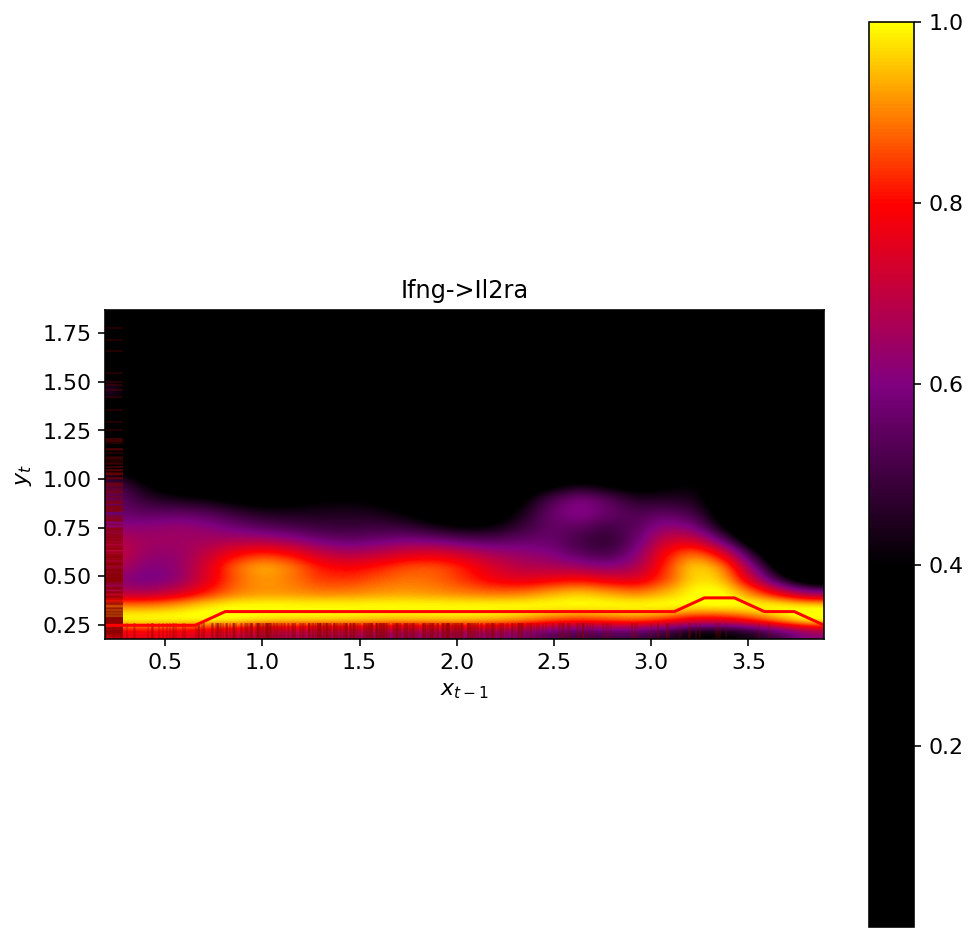

In [46]:
sc.pl.viz_response(adata, np.array([['Ifng','Il2ra']]),grid_num=25)

Create causal_model successfully


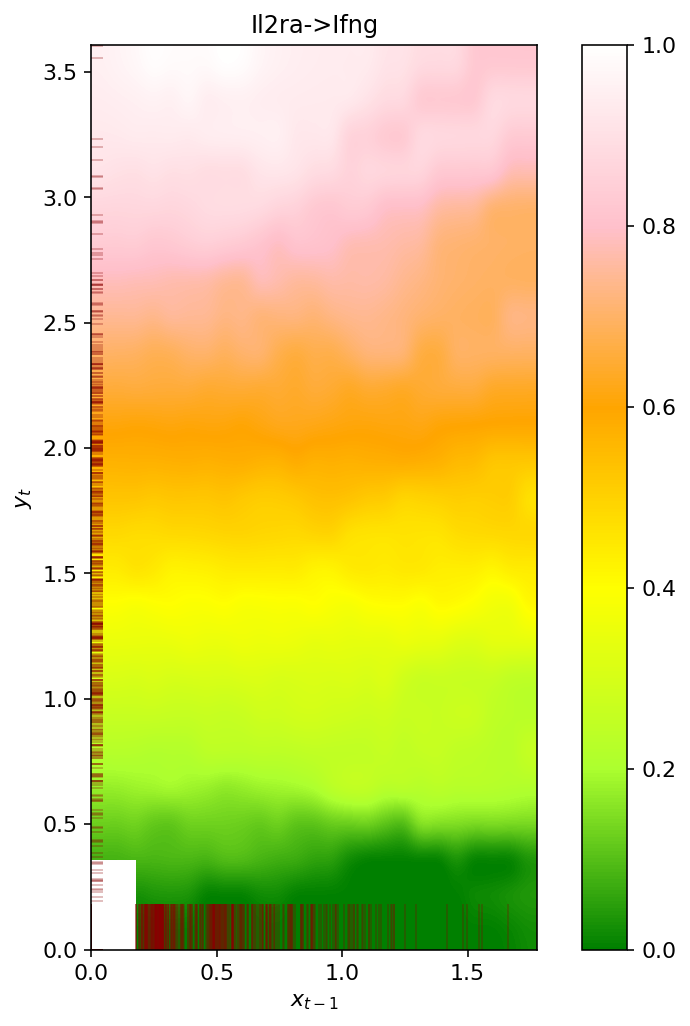

In [19]:
sc.pl.viz_causality(adata,np.array([['Il2ra','Ifng']]),grid_num=25, log=False)

Create causal_model successfully


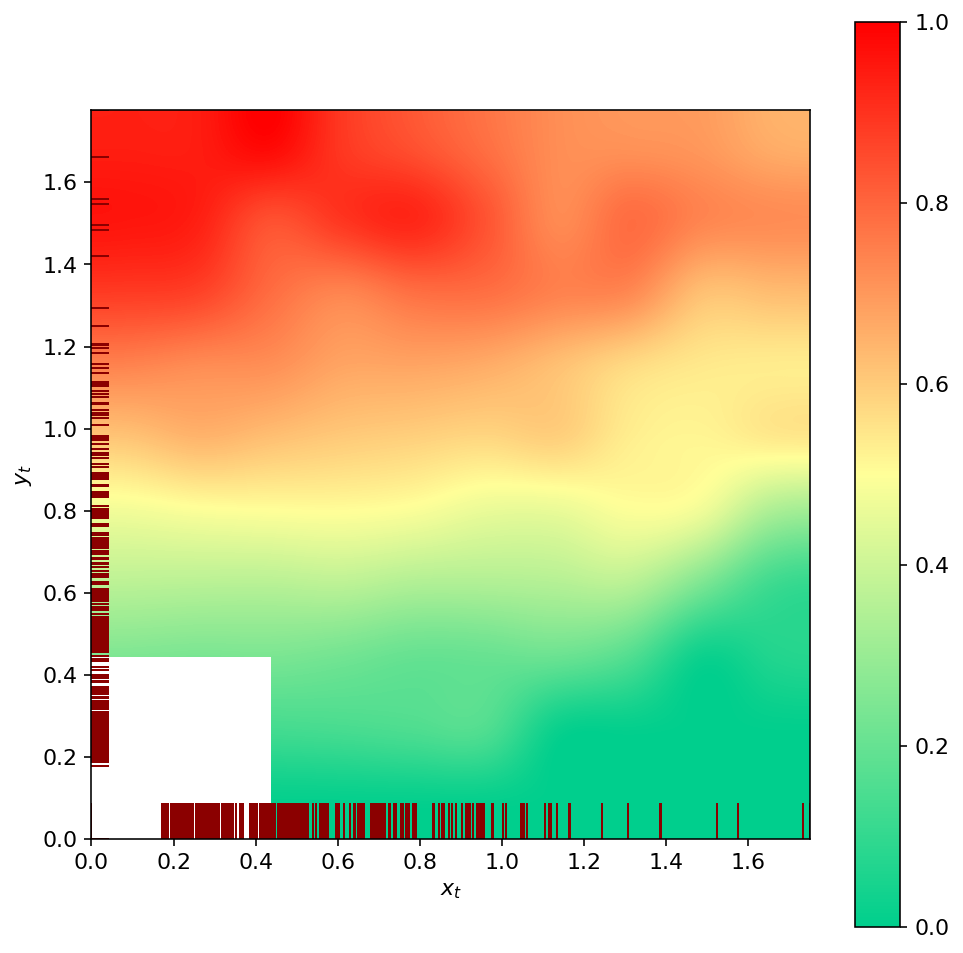

In [20]:
sc.pl.viz_comb_logic(adata,np.array([['Irf4','Il2ra', 'Ifng']]),grid_num=10, log=False)

Calculate causality score (RDI) from each TF to potential target:: 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]


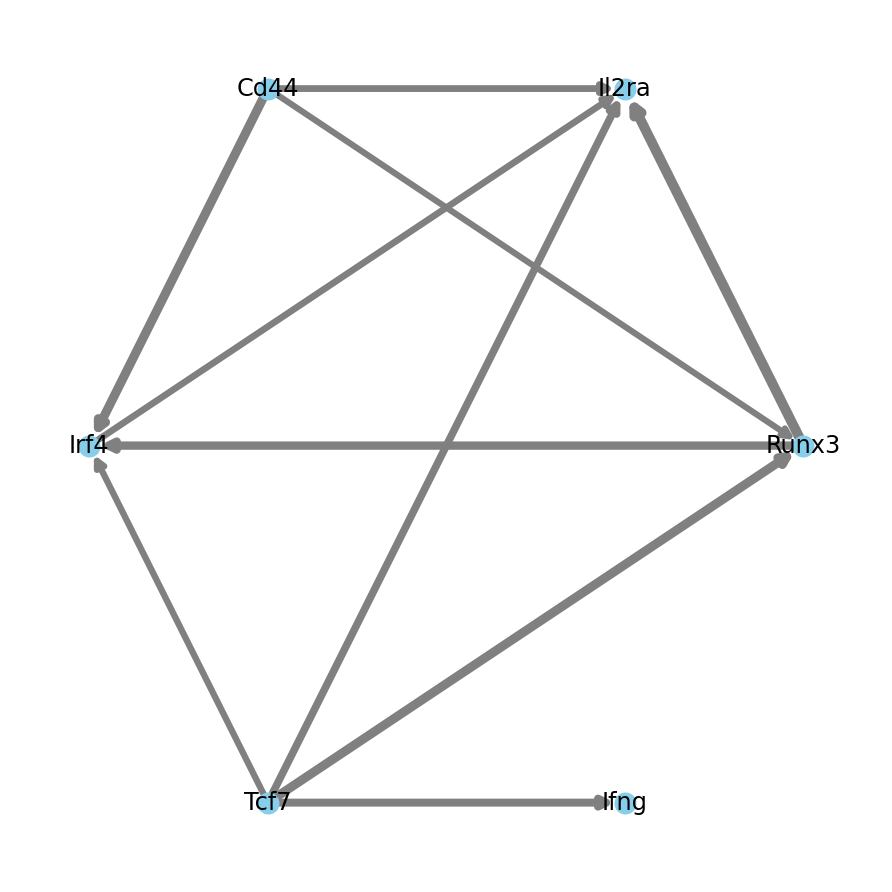

In [34]:
adata_slt_subset = adata[:, ["Il2ra", "Ifng", "Irf4", "Runx3", 'Cd44','Tcf7']].copy()
Scribe(adata_slt_subset, t0_key='spliced', t1_key='unspliced')
sc.pl.vis_causal_net(adata_slt_subset, figsize=[6, 6], layout='circular')

Calculate causality score (RDI) from each TF to potential target:: 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]


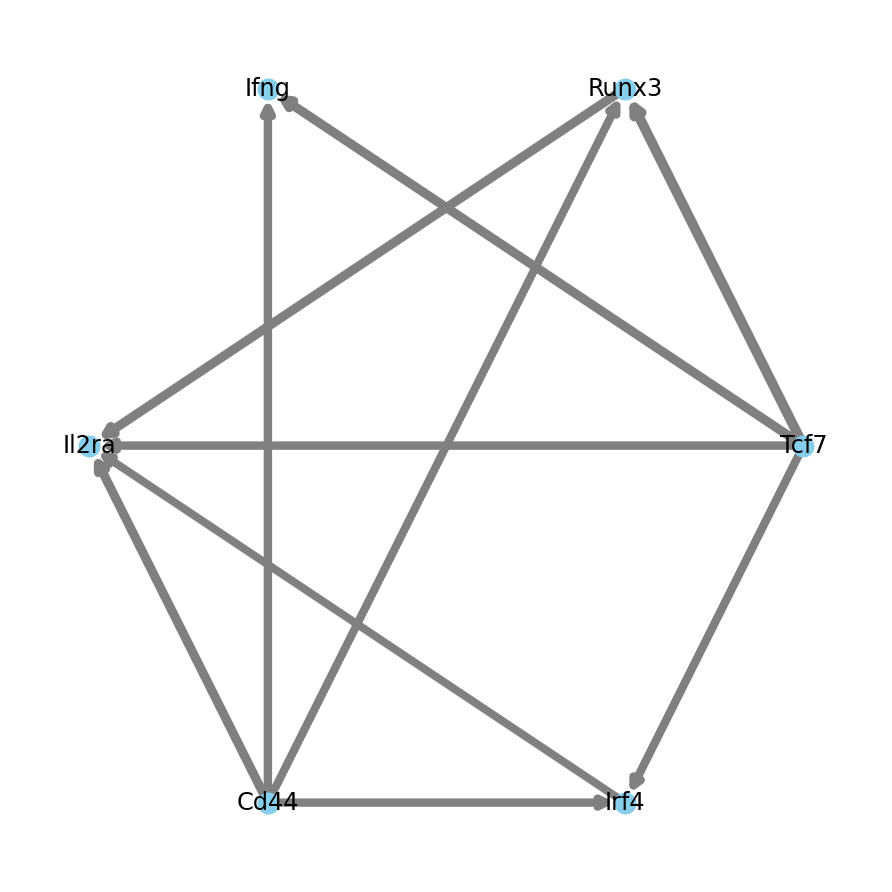

In [39]:
adata_slt_subset = adata[:, ["Il2ra", "Ifng", "Irf4", "Runx3", 'Cd44','Tcf7']].copy()
Scribe(adata_slt_subset, t0_key='spliced', t1_key='unspliced')
sc.pl.vis_causal_net(adata_slt_subset, figsize=[6, 6], layout='circular')

Calculate causality score (RDI) from each TF to potential target:: 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]


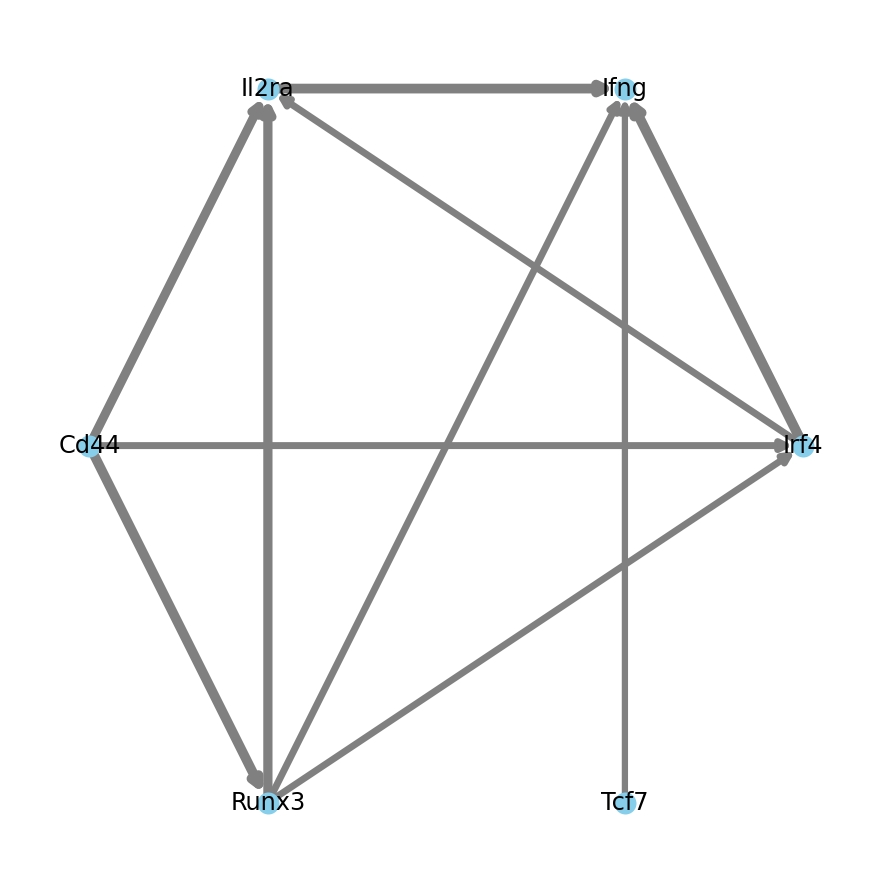

In [50]:
adata_slt_subset = adata[:, ["Il2ra", "Ifng", "Irf4", "Runx3", 'Cd44','Tcf7']].copy()
Scribe(adata_slt_subset, t0_key='spliced', t1_key='unspliced')
sc.pl.vis_causal_net(adata_slt_subset, figsize=[6, 6], layout='circular')